In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Before run this script, run program that generate learn.txt and test_during_learn.txt files

In [13]:
df_l = pd.read_csv("n_learn_evaluting_Standard.txt", sep=';')

In [14]:
df_l.head()

,MapNumber,EpochNumber,distortion,distortion_gss,quantization,quantization_gss
0,0,0,1.117605,0,0.059252,0
1,0,1,0.044826,0,0.104465,0
2,0,2,0.032888,0,0.092641,0
3,0,3,0.028000,0,0.077633,0
4,0,4,0.027204,0,0.077883,0


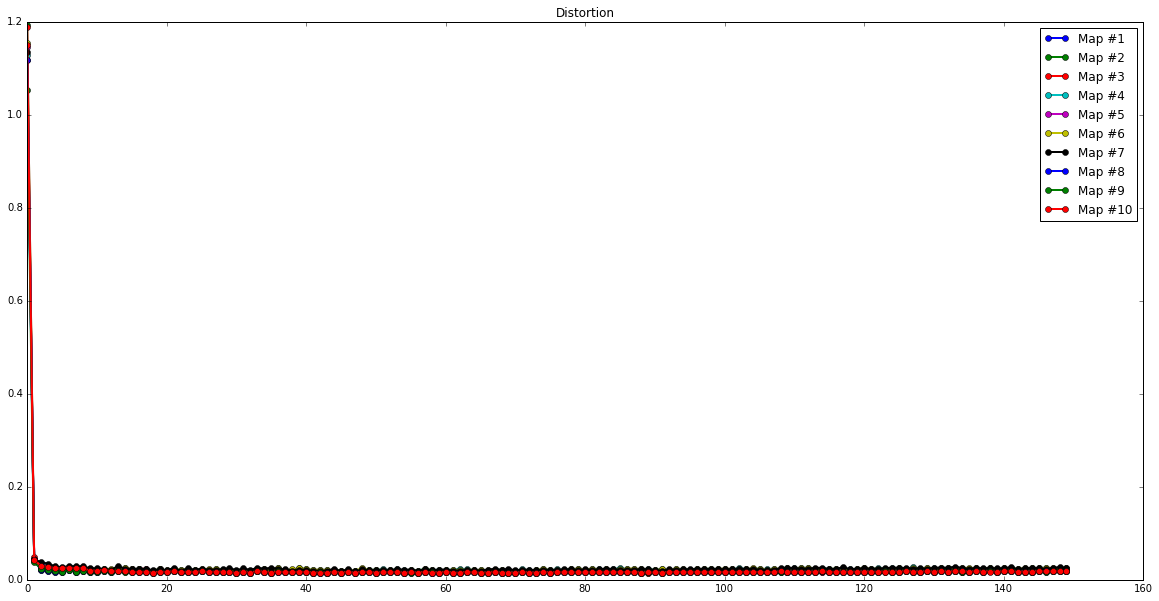

In [15]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_l.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Distortion')
#     plt.xlim([])
    plt.plot(df_l[df_l['MapNumber']==i].reset_index(drop=True)['distortion'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

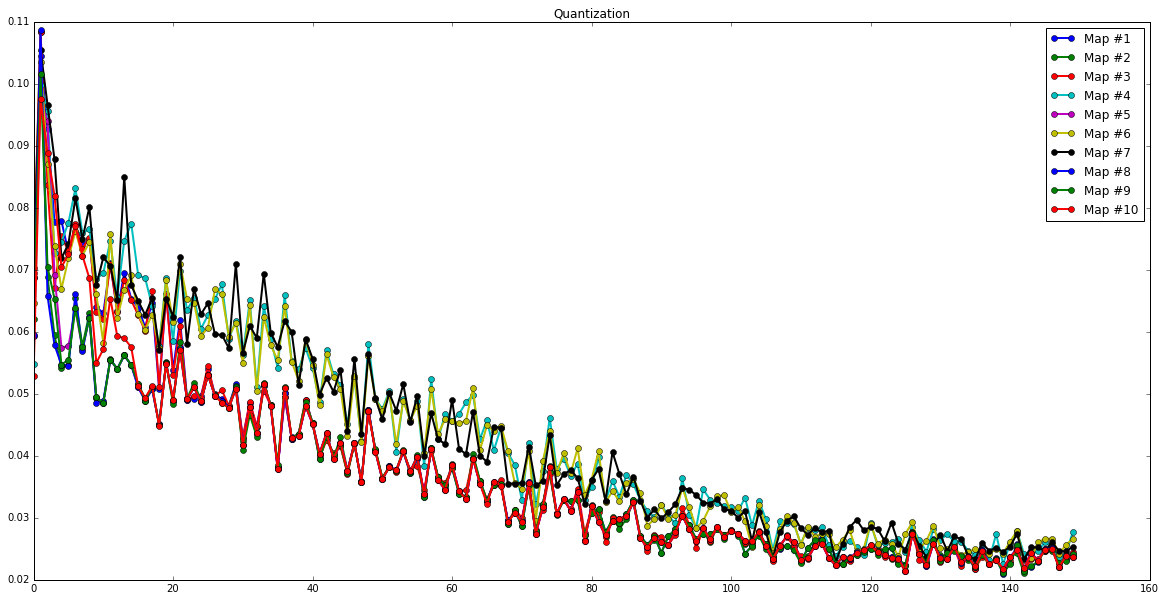

In [16]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_l.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Quantization')
    plt.plot(df_l[df_l['MapNumber']==i].reset_index(drop=True)['quantization'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

## Test during learning (valid)

In [17]:
df_v = pd.read_csv("n_valid_evaluting_Standard.txt", sep=';')
df_v.head(10)

,MapNumber,EpochNumber,distortion,distortion_gss,quantization,quantization_gss
0,0,0,1.136438,0,0.061756,0
1,0,1,0.039860,0,0.104351,0
2,0,2,0.029884,0,0.086097,0
3,0,3,0.029236,0,0.080594,0
4,0,4,0.030459,0,0.078291,0
5,0,5,0.029557,0,0.077368,0
6,0,6,0.024846,0,0.072827,0
7,0,7,0.027089,0,0.085462,0
8,0,8,0.023468,0,0.068857,0
9,0,9,0.023771,0,0.068946,0


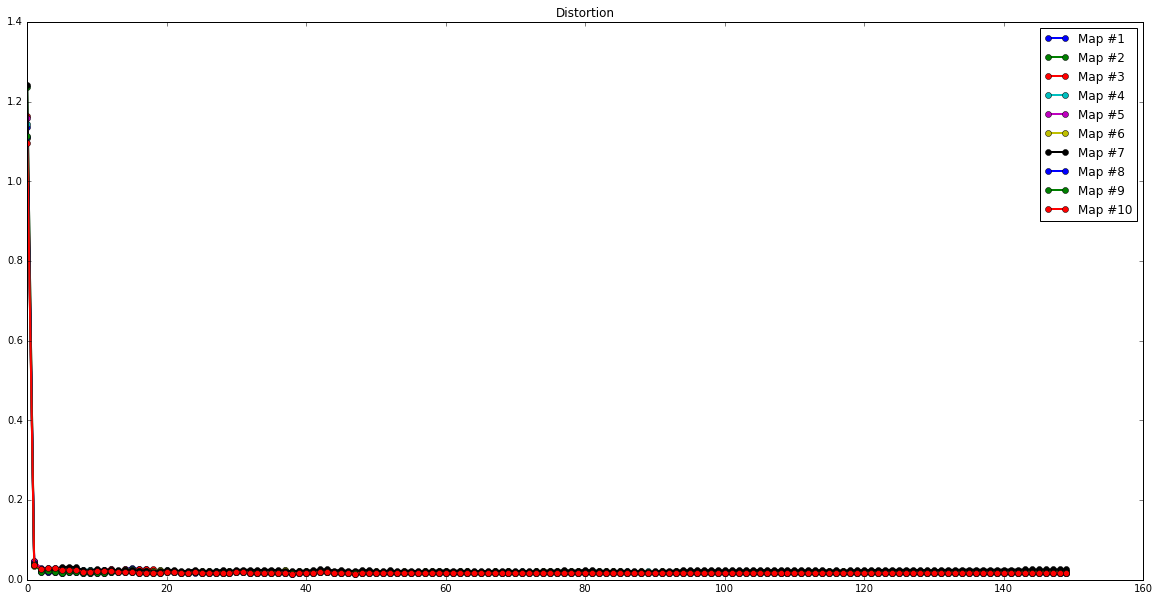

In [18]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_v.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Distortion')
    #plt.xlim([-1, 10])
    plt.plot(df_v[df_v['MapNumber']==i].reset_index(drop=True)['distortion'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

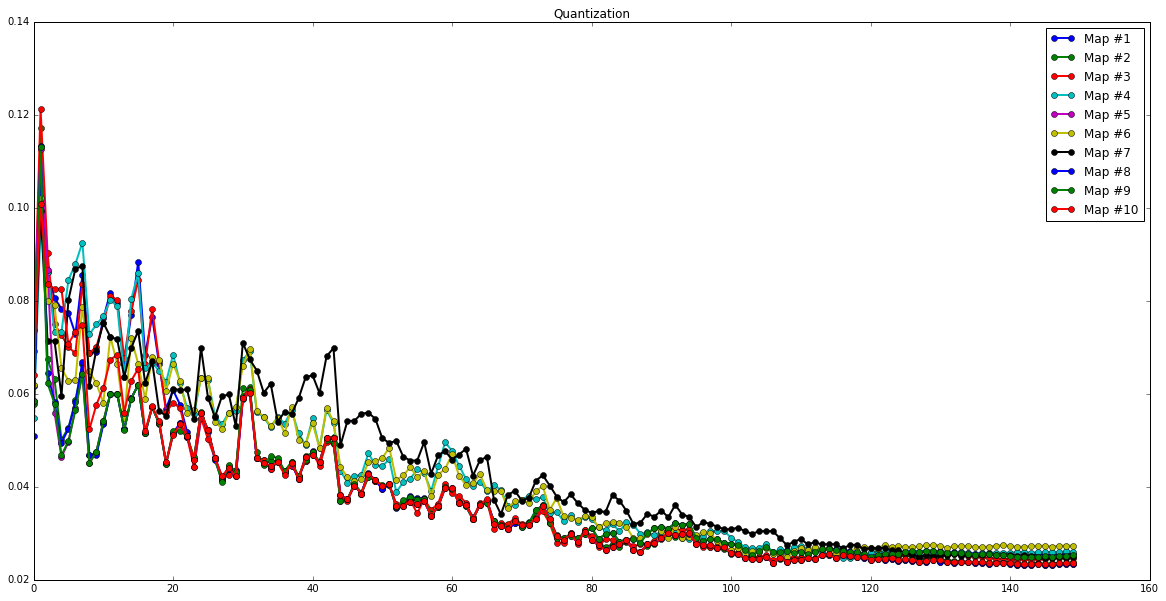

In [19]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_v.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Quantization')
    plt.plot(df_v[df_v['MapNumber']==i].reset_index(drop=True)['quantization'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

In [20]:
df_s = pd.read_csv("n_statistics_Standard.txt", sep=';')
df_s.tail()

,Epoch,PercentageFaults,avg,avg_gss,avg_faulty,avg_gss_faulty,avgdist,avgdist_gss,avgdist_faulty,avgdist_gss_faulty,stddev,stddev_gss,stddev_faulty,stddev_gss_faulty,stddevdist,stddevdist_gss,stddevdist_faulty,stddevdist_gss_faulty
4525,150,25,0.025102,0,0.190423,0,0.019385,0,933.224158,0,0.000795,0,0.049503,0,0.002815,0,102.977829,0
4526,150,26,0.025102,0,0.209496,0,0.019385,0,991.642266,0,0.000795,0,0.063759,0,0.002815,0,104.119881,0
4527,150,27,0.025102,0,0.227599,0,0.019385,0,1042.087687,0,0.000795,0,0.065812,0,0.002815,0,115.247108,0
4528,150,28,0.025102,0,0.261259,0,0.019385,0,1098.628259,0,0.000795,0,0.095039,0,0.002815,0,142.649078,0
4529,150,29,0.025102,0,0.289297,0,0.019385,0,1146.358604,0,0.000795,0,0.132189,0,0.002815,0,139.062622,0


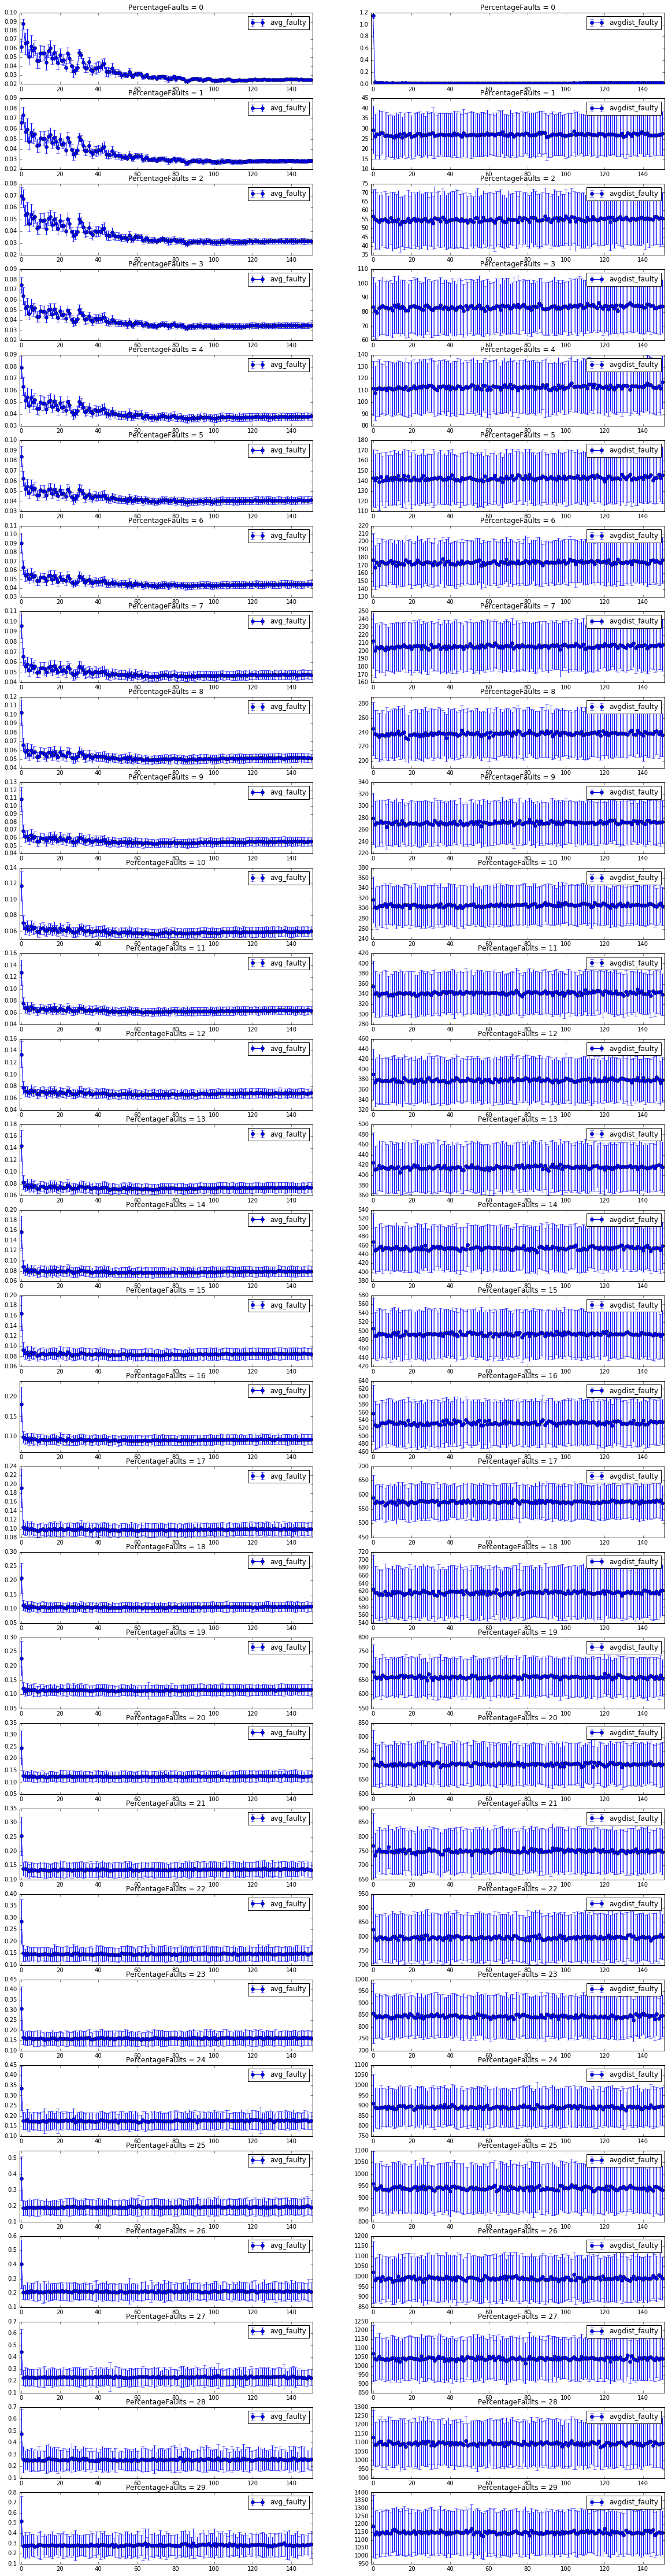

In [21]:
width = 20
height = 400
plt.figure(figsize=(width, height))
num = len(df_s['Epoch'].unique())
k = 1
for i in df_s['PercentageFaults'].unique():
    avg = df_s[df_s['PercentageFaults']==i].filter(regex=".*[^s]_faulty").filter(regex="avg.*").reset_index(drop=True)
    avg_iter = avg.__iter__()
    stddev = df_s[df_s['PercentageFaults']==i].filter(regex=".*[^s]_faulty").filter(regex="stddev.*").reset_index(drop=True)
    stddev_iter = stddev.__iter__()
    for j in range(0,2):
        plt.subplot(num,2,k)
        plt.xlim([-1, num])
        plt.title('PercentageFaults = ' + str(i))
        plt.errorbar(range(0,num), avg[avg_iter.__next__()], yerr=stddev[stddev_iter.__next__()], fmt='-o')
        plt.legend()
        k += 1

In [22]:
df_s[df_s['PercentageFaults']==0].filter(regex=".*[^s]_faulty")

,avg_faulty,avgdist_faulty,stddev_faulty,stddevdist_faulty
0,0.062036,1.152864,0.006118,0.045862
30,0.087521,0.034537,0.005408,0.003438
60,0.065399,0.021670,0.012299,0.004417
90,0.067047,0.022153,0.014697,0.005026
120,0.050458,0.019831,0.008963,0.003706
150,0.062557,0.020233,0.012215,0.004657
180,0.058145,0.018577,0.008381,0.002934
210,0.060567,0.019546,0.008394,0.003475
240,0.046151,0.017023,0.008367,0.002514
270,0.046427,0.017216,0.008930,0.003034
